## Grid simulations mini-project
#### Author: Hannah Sheahan
#### Date: 11/07/2019

#### There are two questions to answer here in this mini-project:
##### 1. Can you get 6-fold modulations in aggregate signal by making randomly directed traversals across a square environment if the underlying neural representation of that space is 6-fold symmetric, just by stacking layers of representations of different scales (according to the known scale difference between them) and with some relative phases between each grid layer.
##### 2. How might a 2D/4-fold symmetric structure emerge from a 6-fold grid structure? If 6-fold grid structure does exist, how do people say that they factorised representation into 2 axes? The issue with grid cell patterns (6 fold) is that they dont factorise into 2 dimensions. So how does that transformation/computation take place? This is relevant theory both for the Constantinescu paper and the odor paper.

##### 3. What if noise is not symmetric in 2D? i.e. y- and x- gaussian noise is assymetric. There is no obvious reason which way around this should go in 2D cases, but I wonder about what this might do to the inferred lattice just based off of the traversal fMRI literature. Could this give rise to a 6-fold looking lattice when really there is a 4-fold one?

In [1]:
import gridHelperFunctions as gf
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy import signal
import sklearn
import matplotlib.pyplot as plt
import matplotlib.patches as pltpatches
import math
import sys
import time
import random
%matplotlib inline


## 1.  Create a basic initial layer grid simulator
#### Use a coding scheme made up from gaussians with independent noise and spacing variables, i.e. with variables for:
###### - spacing between them
###### - noise in each gaussian
###### - angle of code orientation
###### - phase anchor

##### Note: defining sinusoids over odd and even rows will not work, as you will end up stretching the grid in the y-axis

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


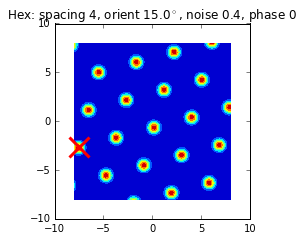

In [2]:
# Free parameters
gridxspacing = 4
noise = 0.4
angle = math.radians(15)        # anti-clockwise rotation
phase = 0                       # distance from centre of square in x-dim
resolution = 100                 # number of points on x-dim
gridrange = [-8, 8]
plotrange = [-10, 10]
coordMethod = 1
#-----------------------
# Create a hex grid
fig = plt.figure(figsize=(3.5, 4))
ax = fig.gca()

print(ax)
x,y,z = gf.createHexGrid(gridxspacing, noise, angle, phase, resolution, gridrange, plotrange, coordMethod, True, ax) 
print(ax)

# choose a random max point on the grid (empirical max, not based on known centres)
xloc, yloc = gf.findMaxPointCentre(z)

# Plot to mark the selected point with an 'x'
ax.plot(x[xloc][yloc], y[xloc][yloc], marker='x',color='red', markersize=20, markeredgewidth=3)
plt.show()

print(x[xloc][yloc], y[xloc][yloc])



In [3]:
# Now try stacking some grids for fun (seems to work fine, looks like a wacky alien thing which is cool, just like for the planets)
_,_,z2 = gf.createHexGrid(gridxspacing*2, noise*2, angle, phase, resolution, gridrange, plotrange, coordMethod, False)
_,_,z3 = gf.createHexGrid(gridxspacing*3, noise*5, 0, phase, resolution, gridrange, plotrange, coordMethod, False)
#gf.plotGrid(x, y, z+z2+z3, plotrange, False)


Error: you cannot define a grid spacing larger than 10. Using maximum spacing value of 10 instead.


## 2. Write a function that evaluates the X-foldness of a given grid
##### so that we can see a plot of the evidence for a given grid being 6-fold v 5-fold v 4-fold etc


In [ ]:
# is the way to do this to choose a given point closest to the centre, 0,0, and then choose a second point closest to that point (**actually it could be any other point on the map), draw a line between them and then record the activity associated with rotating that line around 360 degrees?
# we should get some kind of activity vs angle pattern and can fit n-fold wave-form models to it to see which N-fold explains the most variance etc
# repeat x all dots within some range. * I'm pretty sure this method will work when drawing a line between one dot and any other dot in the scene. The phase of the activation pattern will be different for each pair of dots but the frequency will be the same.

# some sort of Fourier analysis might work?
# ok more formally, each axis of symmetry requires that f(t) = f(-t), for values t along the axis T

# I guess I could choose a random angle theta, flip the image about that angle at a particular point and the check the correlation between the flipped image and the other side? that wouuld give correlations in heatmap at each angle.

# ***best way is to choose a random point, then expand a radius from that point outwards until it finds the centre of the next closest point (by evaluating when heat starts going in negative gradient), then finds the line connecting those two, then finds the next most closest point that doesnt fall along the same axis. This defines your two grid axes. The distance between them and the angle between them define the form of the lattice. Or just take the first line of radius R and rotate it 360 degrees then plot the generated heatmap. That waveform can be mapped to different kinds of lattices. Can do fourier analysis on the resulting waveform.)

# have a go!


In [ ]:
# choose a random max point on the grid (not based on known centres)
xloc, yloc = findMaxPointCentre(z)
plt.plot(x[xloc][yloc], y[xloc][yloc], 'x',color='black')

## 3. Have an agent make random traversals across a given square grid
##### of approx uniformly distributed distances and angles,  (i.e. sample the trajectories uniform randomly from a distance v angle space).

##### - plot the aggregate 'highs' traversed across the grid as a function of angle of movement

In [ ]:
# Code goes here
